# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from pandas.io.parsers import read_csv
import os
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

signnames = read_csv("signnames.csv").values[:, 1]    
X_train_original, y_train_original = train['features'], train['labels']
X_valid_original, y_valid_original = valid['features'], valid['labels']
X_test_original, y_test_original = test['features'], test['labels']

In [2]:
print(y_train_original.shape)
print(X_train_original.shape)
print(y_train_original[0])

(34799,)
(34799, 32, 32, 3)
41


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = np.size(X_train_original, 0)

# TODO: Number of validation examples
n_validation = np.size(X_valid_original, 0)

# TODO: Number of testing examples.
n_test = np.size(X_test_original, 0)

# TODO: What's the shape of an traffic sign image?
image_shape = np.size(X_train_original, 1)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train_original))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(np.shape(X_train_original))

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43
(34799, 32, 32, 3)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_images(class_indices, x, y):
    fig = plt.figure(figsize=(6*4, 8*4))
    for idx in range(0, n_classes):
        plt.subplot(8, 6, idx + 1)
        plt.title(signnames[y[class_indices[idx]]])
        plt.imshow(x[class_indices[idx]])
    fig.tight_layout()
    #plt.savefig("traffic_signs_original.png")

In [5]:
train_classes, train_indices, train_counts = np.unique(y_train_original, return_index = True, return_counts = True)
valid_classes, valid_indices, valid_counts = np.unique(y_valid_original, return_index = True, return_counts = True)
test_classes, test_indices, test_counts = np.unique(y_test_original, return_index = True, return_counts = True)
print(train_indices)

[ 9960  2220 31439  5370  6810 12360 21450 23730 15870 11040 17130  8580
 27329 21810 29219 29909  5010 30449 20370  6630 25950 25680  4500  1770
 10800 33449  1230 10350 26849 10560 25020   210 10140 26250 20010 18930
   900  4830 14010 25410  4200     0  9750]


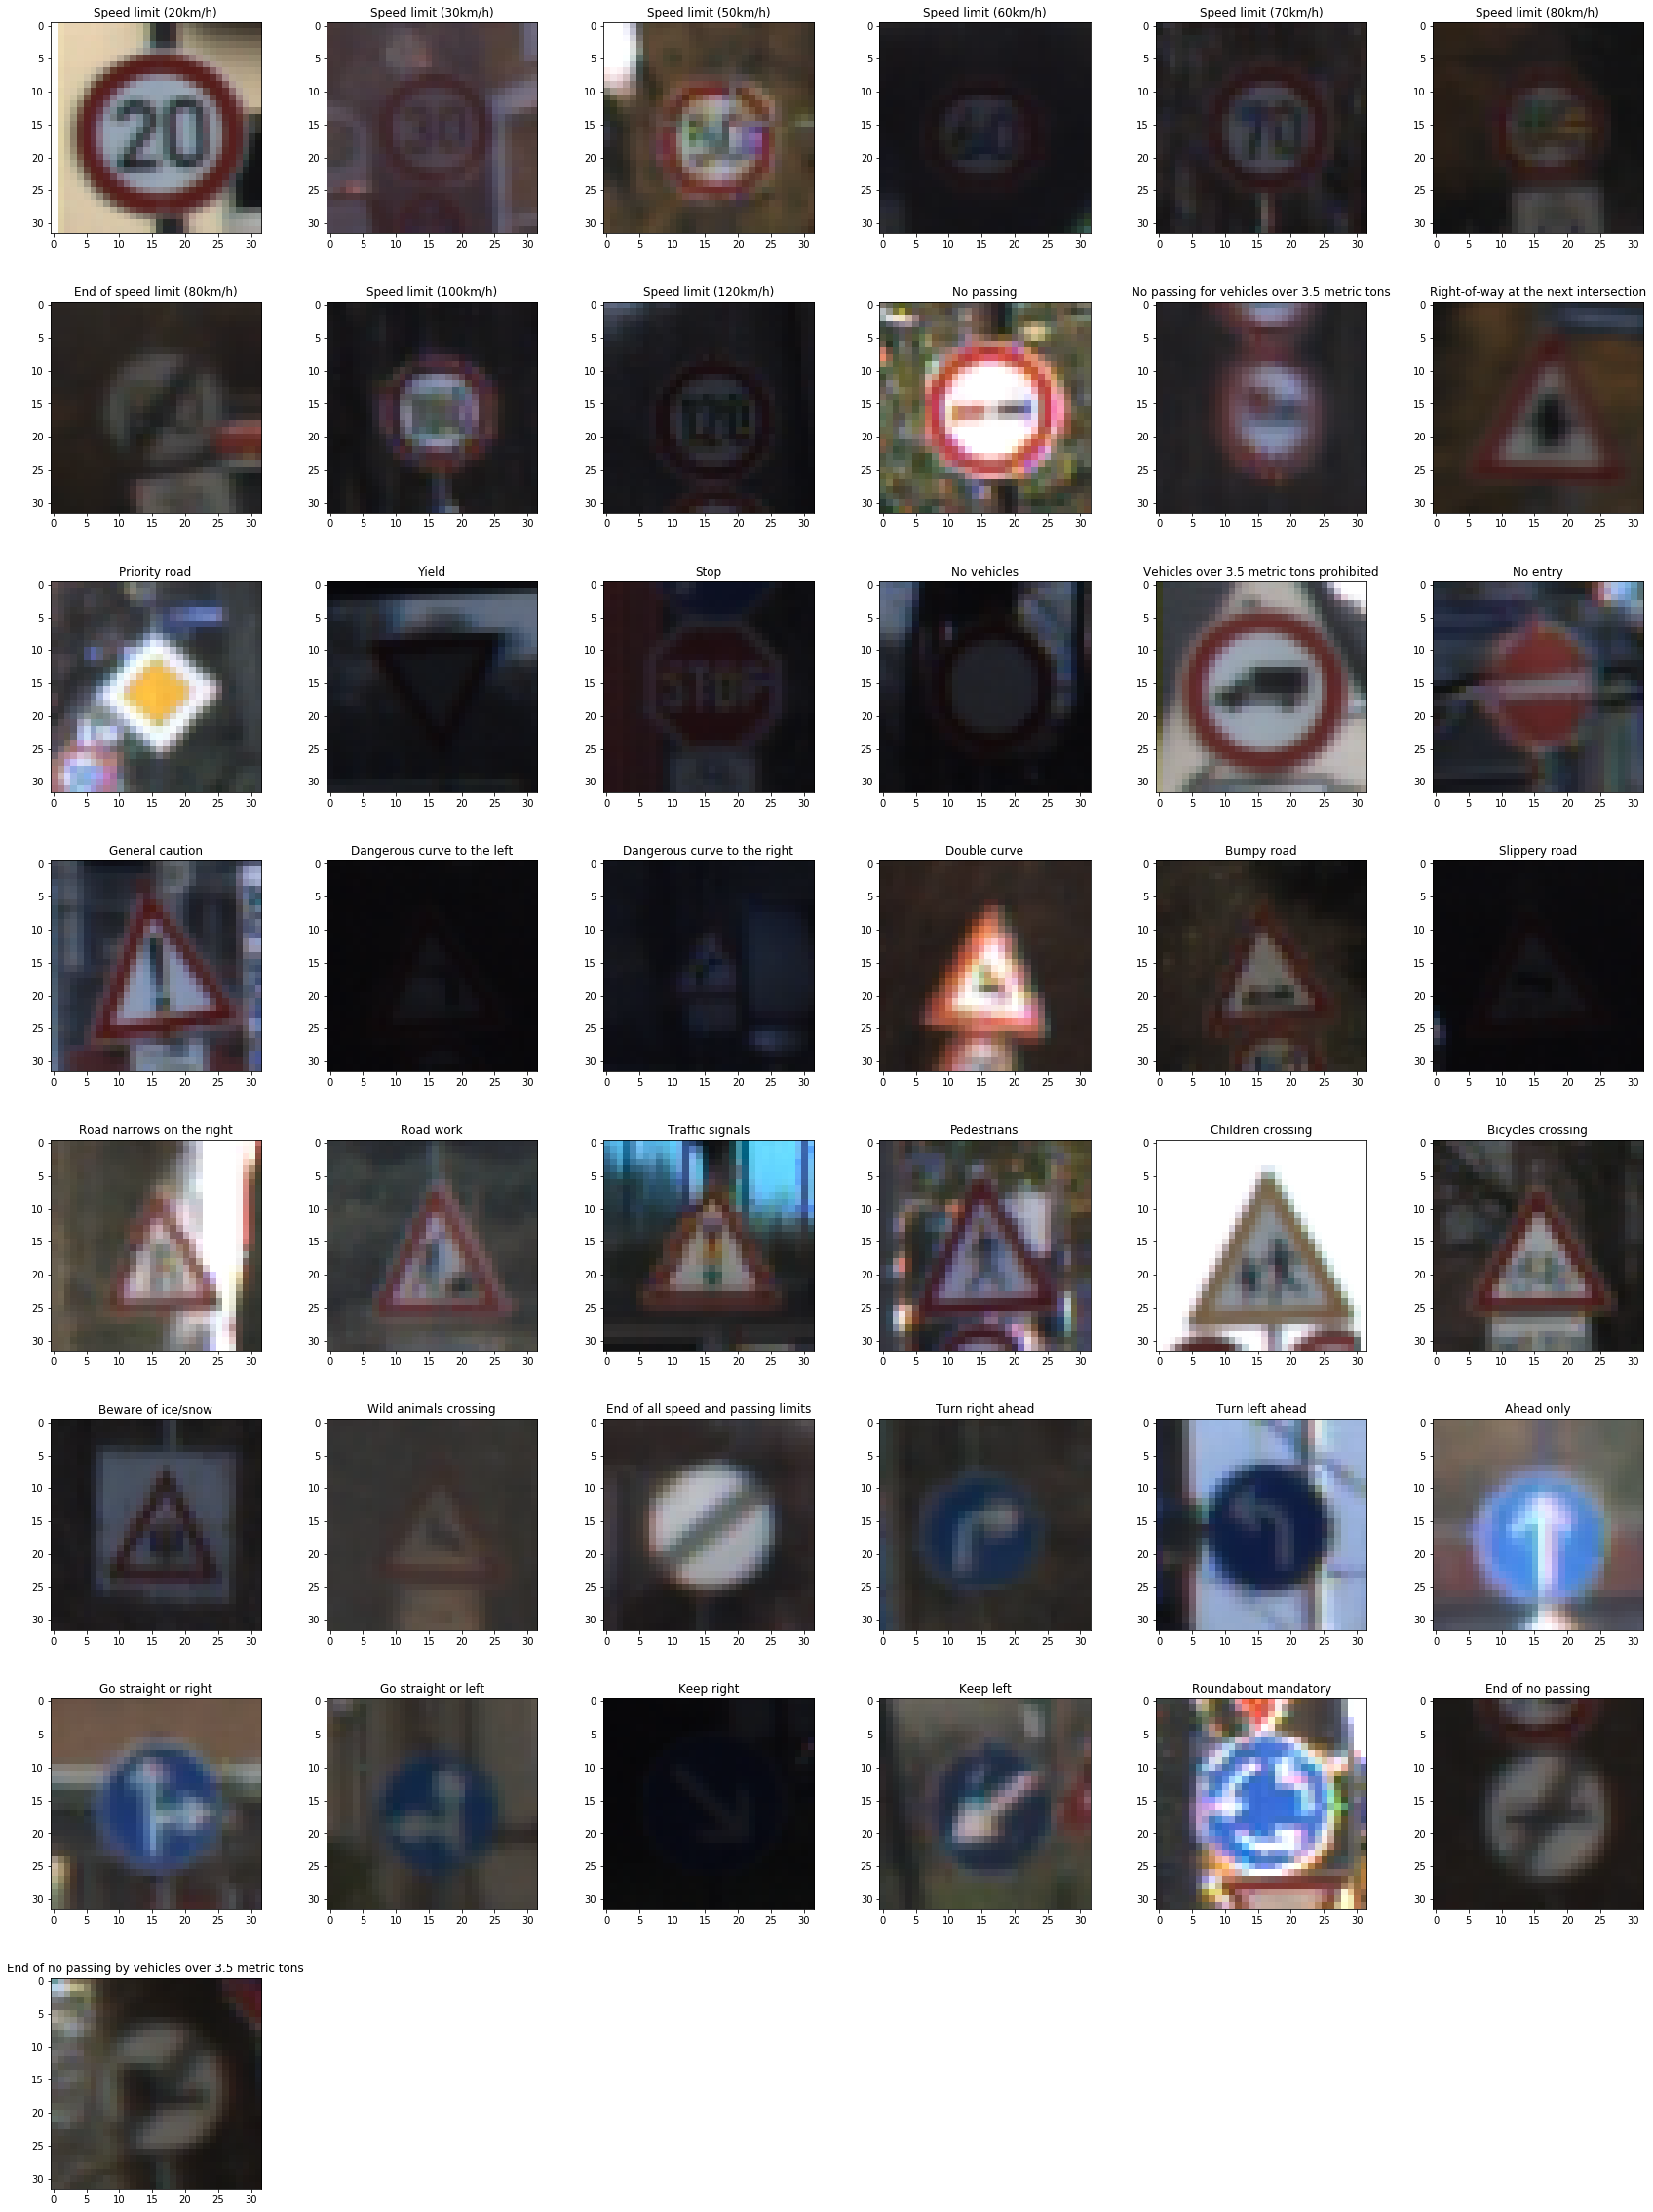

In [6]:
show_images(train_indices, X_train_original, y_train_original)

In [7]:
def show_stats_image(class_counts, title):
    fig = plt.figure(figsize=(8, 6))
    plt.bar(np.arange(n_classes), class_counts, align='center')
    plt.xlabel('Class')
    plt.ylabel('Number of ' + title + ' examples')
    plt.xlim([-1, 43])
    #plt.savefig("numClasses.png")
    plt.show()

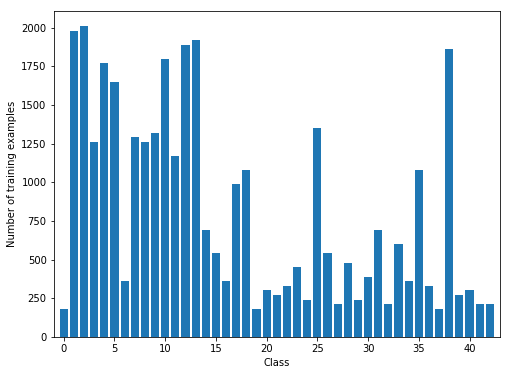

In [8]:
show_stats_image(train_counts, 'training')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
import numpy as np
from sklearn.utils import shuffle
from skimage import exposure

def process_images(images, labels, isShuffle=True):
    images = 0.299 * images[:,:,:,0] + 0.587 * images[:,:,:,1] + 0.114 * images[:,:,:,2]
    images = (images / 255.0).astype(np.float32)
    for i in range(len(images)):
        images[i]=exposure.equalize_adapthist(images[i])
    images = images.reshape(images.shape+(1,))
    if isShuffle:
        images, labels = shuffle(images, labels)
    return images, labels

In [10]:
X_train, y_train = process_images(X_train_original, y_train_original)
X_valid, y_valid = process_images(X_valid_original, y_valid_original)
X_test, y_test = process_images(X_test_original, y_test_original)

/home/wengyao04/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [11]:
X_train_, y_train_ = process_images(X_train_original, y_train_original, False)

/home/wengyao04/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [12]:
def plot_processed_images(image_index_list):
    fig = plt.figure(figsize=(12, 6))
    idx = 0
    for image_idx in image_index_list:
        idx = idx + 1
        plt.subplot(2, 4, idx)
        original = X_train_original[image_idx]
        plt.title(signnames[y_train_[image_idx]])
        plt.imshow(original)
        
        idx = idx + 1
        plt.subplot(2, 4, idx)
        gray = X_train_[image_idx]
        plt.title(signnames[y_train_[image_idx]])
        plt.imshow(gray.reshape(32,32), cmap = plt.get_cmap('gray'))
    fig.tight_layout()
    plt.savefig('preprocessed_sign.png')
#print(signnames[y_train[0]])

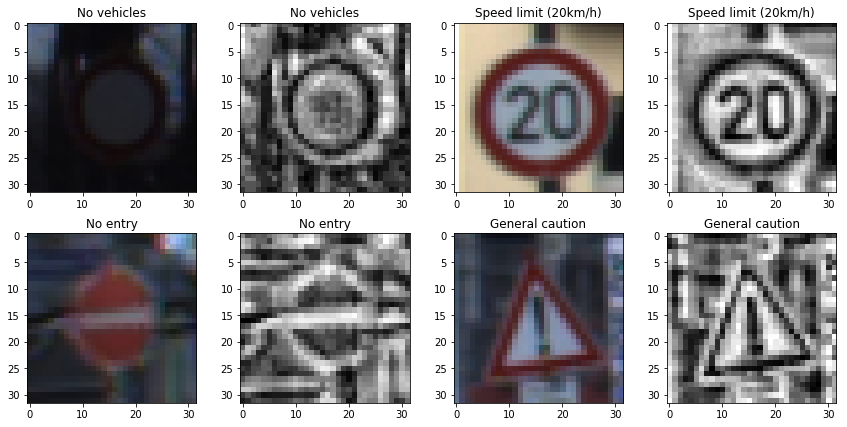

In [13]:
image_index_list = [29909, 9960, 30449, 20370]
#plt.imshow(X_train_original[21810])
#plt.imshow(X_train_[21810].reshape(32,32), cmap = plt.get_cmap('gray'))
plot_processed_images(image_index_list)

In [23]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                    zoom_range=0.2, shear_range=0.5, fill_mode='nearest')

In [26]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
example_image = X_train_[20370]
x = example_image.reshape((1,) + example_image.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
i = 0
for batch in data_generator.flow(x, batch_size=1,
                                 save_to_dir='.', save_prefix='train_general_caution', save_format='jpg'):
    i += 1
    if i > 8:
        break  # otherwise the generator would loop indefinitely

['train_general_caution_0_6703.jpg', 'train_general_caution_0_4602.jpg', 'train_general_caution_0_3343.jpg', 'train_general_caution_0_4980.jpg', 'train_general_caution_0_5339.jpg', 'train_general_caution_0_3178.jpg', 'train_general_caution_0_1701.jpg', 'train_general_caution_0_7278.jpg']


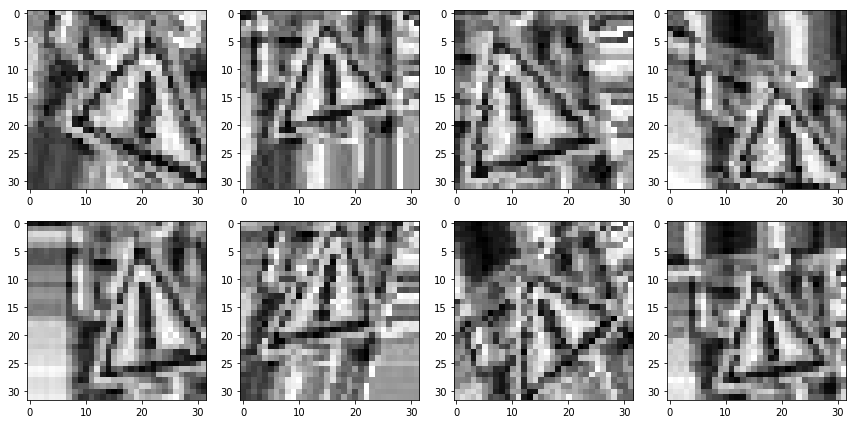

In [37]:
import os
import matplotlib.image as mpimg
general_image_list = [x for x in os.listdir() if x.startswith("train_general_")]
print (general_image_list)
def plot_augumented_images(image_index_list):
    fig = plt.figure(figsize=(12, 6))
    idx = 0
    for image in image_index_list:
        idx = idx + 1
        plt.subplot(2, 4, idx)
        image_ =  mpimg.imread(image)
        plt.imshow(image_.reshape(32,32), cmap = plt.get_cmap('gray'))
    fig.tight_layout()
    plt.savefig('augumented_images.png')
plot_augumented_images(general_image_list)

### Model Architecture

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
dtype = tf.float32
def variable_with_weight_decay(name, shape, stddev, wd):
    var = tf.get_variable(name, shape=shape, dtype=dtype, initializer=tf.truncated_normal_initializer(stddev=stddev))
    if wd is not None:
        weight_decay = tf.multiply(tf.nn.l2_loss(var), wd, name='weight_loss')
        tf.add_to_collection('losses', weight_decay)
    return var

In [15]:
BATCH_SIZE=512
def inference(image, is_training):
    with tf.variable_scope('conv1') as scope:
        weights = variable_with_weight_decay('weights', shape=[5,5,1,64], stddev=0.01, wd=0.0)
        biases = tf.get_variable('biases', shape=[64], dtype=dtype, initializer=tf.constant_initializer(0.01))
        conv = tf.nn.conv2d(image, weights, strides=[1,1,1,1], padding='SAME')
        pre_activation = tf.nn.bias_add(conv, biases)
        conv1 = tf.nn.relu(pre_activation, name=scope.name)
    with tf.variable_scope('pooling1') as scope:
        pool1 = tf.nn.max_pool(conv1, ksize=[1,3,3,1], strides=[1,2,2,1], padding='SAME', name='pooling1')
        pool1 = tf.cond(is_training, lambda: tf.nn.dropout(pool1, keep_prob = 0.7), lambda: pool1)
        
    with tf.variable_scope('conv2') as scope:
        weights = variable_with_weight_decay('weights', shape=[3,3,64,128], stddev=0.01, wd=0.0)
        biases = tf.get_variable('biases', shape=[128], initializer=tf.constant_initializer(0.01))
        conv = tf.nn.conv2d(pool1, weights, strides=[1,1,1,1], padding='SAME')
        pre_activation = tf.nn.bias_add(conv, biases)
        conv2 = tf.nn.relu(pre_activation, name=scope.name)
    with tf.variable_scope('pooling2') as scope:
        pool2 = tf.nn.max_pool(conv2, ksize=[1,3,3,1], strides=[1,1,1,1], padding='SAME', name='pooling2')
        pool2 = tf.cond(is_training, lambda: tf.nn.dropout(pool2, keep_prob=0.7), lambda: pool2)
        
    with tf.variable_scope('conv3') as scope:
        weights = variable_with_weight_decay('weights', shape=[3,3,128,256], stddev=0.01, wd=0.0)
        biases = tf.get_variable('biases', shape=[256], initializer=tf.constant_initializer(0.01))
        conv = tf.nn.conv2d(pool2, weights, strides=[1,1,1,1], padding='SAME')
        pre_activation = tf.nn.bias_add(conv, biases)
        conv3 = tf.nn.relu(pre_activation, name=scope.name)
    with tf.variable_scope('pooling3') as scope:
        pool3 = tf.nn.max_pool(conv3, ksize=[1,3,3,1], strides=[1,1,1,1], padding='SAME', name='pooling3')
        pool3 = tf.cond(is_training, lambda: tf.nn.dropout(pool3, keep_prob=0.7), lambda: pool3)
        

    with tf.variable_scope('conv4') as scope:
        weights = variable_with_weight_decay('weights', shape=[3,3,256,512], stddev=0.01, wd=0.0)
        biases = tf.get_variable('biases', shape=[512], initializer=tf.constant_initializer(0.01))
        conv = tf.nn.conv2d(pool3, weights, strides=[1,1,1,1], padding='SAME')
        pre_activation = tf.nn.bias_add(conv, biases)
        conv4 = tf.nn.relu(pre_activation, name=scope.name)
    with tf.variable_scope('pooling4') as scope:
        pool4 = tf.nn.max_pool(conv4, ksize=[1,3,3,1], strides=[1,1,1,1], padding='SAME', name='pooling3')
        pool4 = tf.cond(is_training, lambda: tf.nn.dropout(pool4, keep_prob=0.7), lambda: pool4)
        
    
    with tf.variable_scope('local5') as scope:
        tensor_shape = pool4.get_shape().as_list()
        dim = tensor_shape[1] * tensor_shape[2] * tensor_shape[3]
        reshape = tf.reshape(pool4, [tf.shape(pool4)[0], dim])
        weights = variable_with_weight_decay('weights', shape=[dim, 256], stddev=0.01, wd=0.0)
        biases = tf.get_variable('biases', shape=[256], initializer=tf.constant_initializer(0.01))
        local5 = tf.nn.relu(tf.matmul(reshape, weights) + biases, name=scope.name)
        local5 = tf.cond(is_training, lambda: tf.nn.dropout(local5, keep_prob=0.7), lambda: local5)
        
    with tf.variable_scope('local6') as scope:
        weights = variable_with_weight_decay('weights', shape=[256, 128], stddev=0.01, wd=0.0)
        biases = tf.get_variable('biases', shape=[128], initializer=tf.constant_initializer(0.01))
        local6 = tf.nn.relu(tf.matmul(local5, weights) + biases, name=scope.name)
        local6 = tf.cond(is_training, lambda: tf.nn.dropout(local6, keep_prob=0.5), lambda: local6)
    
    with tf.variable_scope('softmax_linear') as scope:
        weights = variable_with_weight_decay('softmax_linear', shape=[128, n_classes], stddev=0.01, wd=0.0)
        biases = tf.get_variable('biases', shape=[n_classes], initializer=tf.constant_initializer(0.01))
        logits = tf.add(tf.matmul(local6, weights), biases, name='logits')
    return {'logits': logits,
            'pooling1': pool1,
            'pooling2': pool2,
            'pooling3': pool3,
            'pooling4' : pool4,
            'local5': local5,
            'local6': local6}

In [16]:
def predictions(logits):
    return tf.nn.softmax(logits)

In [17]:
def losses(logits, labels):
    with tf.variable_scope('softmax_linear', reuse = True):
        l2_loss = tf.nn.l2_loss(tf.get_variable('softmax_linear'))
    with tf.variable_scope('losses') as scope:
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
        losses = tf.reduce_mean(cross_entropy, name='cross_entropy_mean') + 0.0001 * l2_loss
    return losses

In [18]:
def evaluation(predictions, labels):
    with tf.name_scope('accuracy'):
        with tf.name_scope('correct_prediction'):
            correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
        with tf.name_scope('accuracy'):
            accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy_operation

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
class EarlyStopping(object):
    def __init__(self, saver, session, patience=100, minimize=True):
        self.minimize = minimize
        self.patience = patience
        self.saver = saver
        self.session = session
        self.best_monitored_value = np.inf if minimize else 0.
        self.best_monitored_epoch = 0
        self.restore_path = None

    def __call__(self, value, epoch):
        if (self.minimize and value < self.best_monitored_value) or (not self.minimize and value > self.best_monitored_value):
            self.best_monitored_value = value
            self.best_monitored_epoch = epoch
            self.restore_path = self.saver.save(self.session, os.getcwd() + "/early_stopping_checkpoint")
        elif self.best_monitored_epoch + self.patience < epoch:
            if self.restore_path != None:
                self.saver.restore(self.session, self.restore_path)
            else:
                print("ERROR: Failed to restore session")
            return True
        return False

In [20]:
def plot_curve(axis, train_values, valid_values, linewidth = 2, train_linestyle = "b-", valid_linestyle = "g-"):
    epochs = train_values.shape[0]
    x_axis = np.arange(epochs)
    axis.plot(x_axis[train_values > 0], train_values[train_values > 0], train_linestyle, linewidth=linewidth, label="train")
    axis.plot(x_axis[valid_values > 0], valid_values[valid_values > 0], valid_linestyle, linewidth=linewidth, label="valid")
    return epochs

def plot_learning_curves(train_loss_history, train_accuracy_history, valid_loss_history, valid_accuracy_history):
    curves_figure = plt.figure(figsize = (12, 6))
    axis = curves_figure.add_subplot(1, 2, 1)
    epochs_plotted = plot_curve(axis, train_accuracy_history,  valid_accuracy_history)

    plt.grid()
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.15)
    plt.xlim(0, epochs_plotted)

    axis = curves_figure.add_subplot(1, 2, 2)
    epochs_plotted = plot_curve(axis, train_loss_history, valid_loss_history)

    plt.grid()
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.ylim(0.0001, 10.)
    plt.xlim(0, epochs_plotted)
    plt.yscale("log")
    plt.savefig("loss_accuracy.png")

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
EPOCHS = 100
early_stopping=None
rate = 0.0005
def train():
    
    image = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    y_true = tf.one_hot(y, n_classes)  
    is_training = tf.placeholder(tf.bool)
    
    with tf.variable_scope("model_variable"):
        train_op = inference(image, is_training)
        logits = train_op['logits']
        predictions_op = predictions(logits)
        losses_op = losses(logits, y_true)
        evaluation_op = evaluation(predictions_op, y_true)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    train_op = optimizer.minimize(losses_op)
    
    saver = tf.train.Saver(tf.global_variables())
    
    datagen = ImageDataGenerator(rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 shear_range=0.5,
                                 fill_mode='nearest')
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    early_stopping = EarlyStopping(tf.train.Saver(), sess, patience = 30, minimize=True)
    
    train_loss_history = np.empty([0], dtype = np.float32)
    train_accuracy_history = np.empty([0], dtype = np.float32)
    valid_loss_history = np.empty([0], dtype = np.float32)
    valid_accuracy_history = np.empty([0], dtype = np.float32)
    
    def get_accuracy_loss_in_batches(X_data, y_data):
        num_examples_ = len(X_data)
        total_accuracy = 0
        total_loss = 0
        for offset in range(0, num_examples_, BATCH_SIZE):
            batch_x_data, batch_y_data = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
            accuracy_, loss_ = sess.run([evaluation_op, losses_op], feed_dict={image: batch_x_data, y: batch_y_data,
                                                                               is_training: False})
            total_accuracy += (accuracy_ * len(batch_x_data))
            total_loss += (loss_ * len(batch_x_data))
        return total_accuracy / num_examples_, total_loss / num_examples_
  
    print("Training...")
    for epoch in range(EPOCHS):
        batch_ct = 0
        for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size = BATCH_SIZE):
            batch_ct += 1
            sess.run(train_op, feed_dict={image: x_batch, y: y_batch, is_training: True})
            if batch_ct > (X_train.shape[0] / BATCH_SIZE):
                break
        
        train_acc_, train_loss_ = get_accuracy_loss_in_batches(X_train, y_train)
        val_acc_, val_loss_ = get_accuracy_loss_in_batches(X_valid, y_valid)
        
        train_loss_history = np.append(train_loss_history, [train_loss_])
        train_accuracy_history = np.append(train_accuracy_history, [train_acc_])
        valid_loss_history = np.append(valid_loss_history, [val_loss_])
        valid_accuracy_history = np.append(valid_accuracy_history, [val_acc_])
        
        if early_stopping(val_loss_, epoch):
            print("Early stopping.\nBest monitored loss was {:.8f} at epoch {}.".format(
                early_stopping.best_monitored_value, early_stopping.best_monitored_epoch))
            break
        
        msg = "Epoch {0} --- Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}, Training Loss: {3:.3f} Validation Loss: {4:.3f}"
        print(msg.format(epoch + 1, train_acc_, val_acc_, train_loss_, val_loss_))
    
    test_accuracy, test_loss = get_accuracy_loss_in_batches(X_test, y_test)
    valid_accuracy, valid_loss = get_accuracy_loss_in_batches(X_valid, y_valid)
    model_path = os.getcwd() + "/model"
    saved_model_path = saver.save(sess, model_path)
    print("Model file: " + saved_model_path)
    plot_learning_curves(train_loss_history, train_accuracy_history, valid_loss_history, valid_accuracy_history)
    print(" Valid loss: %.8f, accuracy = %.2f%%)" % (valid_loss, valid_accuracy)) 
    print(" Test loss: %.8f, accuracy = %.2f%%)" % (test_loss, test_accuracy)) 
    

Using TensorFlow backend.


Training...
Epoch 1 --- Training Accuracy:   5.8%, Validation Accuracy:   5.4%, Training Loss: 3.494 Validation Loss: 3.552
Epoch 2 --- Training Accuracy:   5.7%, Validation Accuracy:   5.4%, Training Loss: 3.494 Validation Loss: 3.550
Epoch 3 --- Training Accuracy:   5.8%, Validation Accuracy:   5.4%, Training Loss: 3.395 Validation Loss: 3.490
Epoch 4 --- Training Accuracy:  10.3%, Validation Accuracy:   9.5%, Training Loss: 2.926 Validation Loss: 2.973
Epoch 5 --- Training Accuracy:  15.4%, Validation Accuracy:  14.3%, Training Loss: 2.687 Validation Loss: 2.756
Epoch 6 --- Training Accuracy:  23.1%, Validation Accuracy:  21.7%, Training Loss: 2.355 Validation Loss: 2.438
Epoch 7 --- Training Accuracy:  34.1%, Validation Accuracy:  31.5%, Training Loss: 1.933 Validation Loss: 2.006
Epoch 8 --- Training Accuracy:  44.0%, Validation Accuracy:  40.6%, Training Loss: 1.630 Validation Loss: 1.694
Epoch 9 --- Training Accuracy:  46.4%, Validation Accuracy:  41.7%, Training Loss: 1.430 Val

Epoch 74 --- Training Accuracy:  99.9%, Validation Accuracy:  99.6%, Training Loss: 0.005 Validation Loss: 0.022
Epoch 75 --- Training Accuracy:  99.9%, Validation Accuracy:  99.5%, Training Loss: 0.005 Validation Loss: 0.023
Epoch 76 --- Training Accuracy:  99.9%, Validation Accuracy:  99.5%, Training Loss: 0.005 Validation Loss: 0.025
Epoch 77 --- Training Accuracy:  99.8%, Validation Accuracy:  99.2%, Training Loss: 0.007 Validation Loss: 0.035
Epoch 78 --- Training Accuracy:  99.9%, Validation Accuracy:  99.3%, Training Loss: 0.006 Validation Loss: 0.024
Epoch 79 --- Training Accuracy:  99.9%, Validation Accuracy:  99.0%, Training Loss: 0.005 Validation Loss: 0.038
Epoch 80 --- Training Accuracy:  99.8%, Validation Accuracy:  99.1%, Training Loss: 0.006 Validation Loss: 0.032
Epoch 81 --- Training Accuracy:  99.9%, Validation Accuracy:  99.5%, Training Loss: 0.005 Validation Loss: 0.025
Epoch 82 --- Training Accuracy:  99.9%, Validation Accuracy:  99.5%, Training Loss: 0.005 Valida

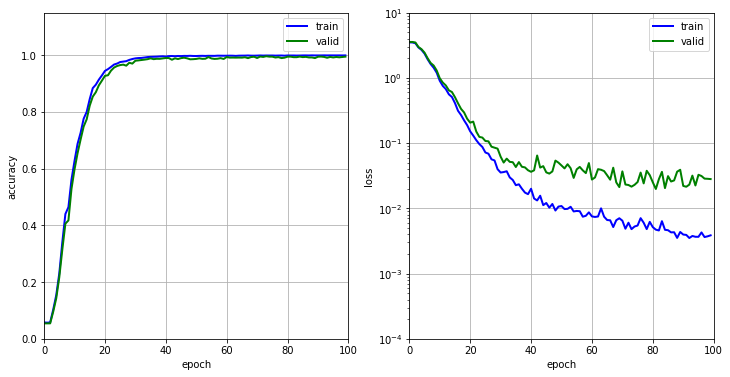

In [22]:
train()

In [117]:
def model_on_test():
    cnt = 0
    with tf.variable_scope("model_variable", reuse=True):
        image = tf.placeholder(tf.float32, shape = (None, 32, 32, 1))
        is_training = tf.placeholder(tf.bool)
        y = tf.placeholder(tf.int32, (None))
        y_true = tf.one_hot(y, n_classes) 
        
        train_op = inference(image, is_training)
        logits = train_op['logits']
        predictions_op = predictions(logits)
        bi = BatchIterator(batch_size=1)
        false_predictions_op = tf.equal(tf.argmax(predictions_op, 1), tf.argmax(y_true, 1))
        
        y_true_idx_op = tf.argmax(y_true, 1)
        y_pred_idx_op = tf.argmax(predictions_op, 1)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    tf.train.Saver().restore(sess, tf.train.latest_checkpoint('.'))
    false_pred_list = []
    for x_batch, y_batch in bi(X_test, y_test):
        false_pred, y_true_idx, y_pred_idx = sess.run([false_predictions_op, y_true_idx_op, y_pred_idx_op], feed_dict = {image : x_batch, y: y_batch, is_training: False})
        if false_pred[0] == False:
            false_pred_=[]
            false_pred_.append(x_batch[0])
            false_pred_.append(y_true_idx[0])
            false_pred_.append(y_pred_idx[0])
            cnt = cnt + 1
            false_pred_list.append(false_pred_)
        if cnt > 7:
            break
    return false_pred_list 
false_pred_list = model_on_test()

INFO:tensorflow:Restoring parameters from /home/wengyao04/machine_learning/udacity_selfdrivingcar_nanodegree/CarND-Traffic-Sign-Classifier-Project/model


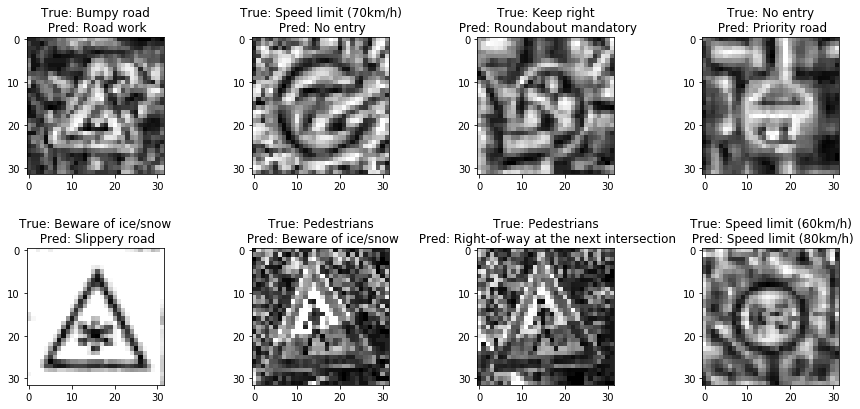

In [122]:
def plot_false_pred_images(image_index_list):
    fig = plt.figure(figsize=(12, 6))
    idx = 0
    for image, y_true_idx, y_pred_idx in image_index_list:
        idx = idx + 1
        plt.subplot(2, 4, idx)
        plt.title("True: " + signnames[y_true_idx] + "\n Pred: " + signnames[y_pred_idx])
        plt.imshow(image.reshape(32,32), cmap = plt.get_cmap('gray'))
    fig.tight_layout()
    plt.savefig('false_predict_images.png')
plot_false_pred_images(false_pred_list)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [194]:
import PIL
from PIL import Image

def resize_image(numpy_array_image, new_width, new_height):
    # convert nympy array image to PIL.Image
    image = Image.fromarray(np.uint8(numpy_array_image))
    image = image.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    # convert PIL.Image into nympy array back again
    return np.array(image)

In [195]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import ndimage, misc
import re
new_images = []
for root, dirnames, filenames in os.walk("traffic_signs"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = resize_image(image, 32, 32)
            new_images.append(image_resized)

In [211]:
#X_new, y_new = process_images(np.array(new_images), [])
new_images_ = np.array(new_images)
#print(new_images_[0])
X_new, y_new = process_images(new_images_, ['Roundabout mandatory', 'Road work', 'Yield', 'Children crossing', 'Speed limit (50km/h)', 'Stop'], False)

/home/wengyao04/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


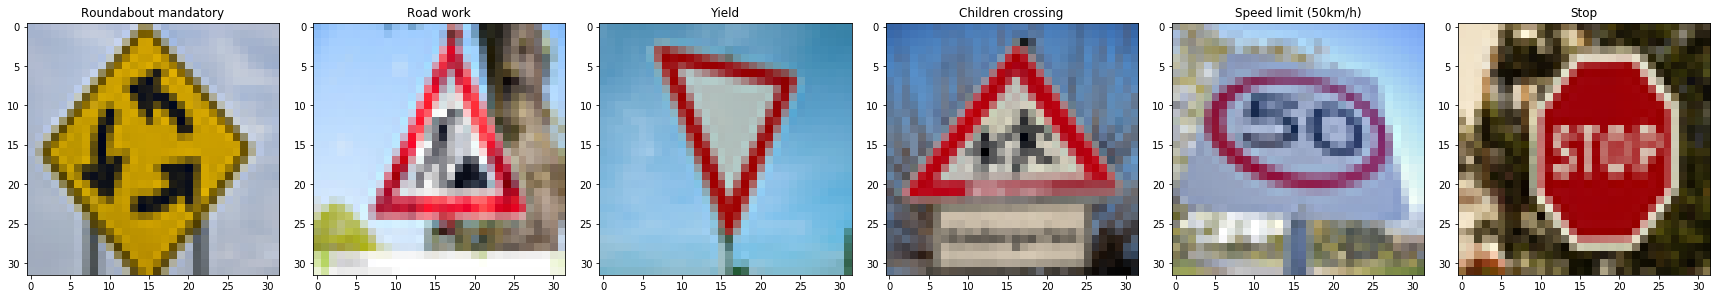

In [212]:
def plot_new_images(image_index_list, label_list):
    fig = plt.figure(figsize=(24,4))
    for idx in range(0, 6):
        plt.subplot(1, 6, idx + 1)
        plt.imshow(image_index_list[idx], cmap = plt.get_cmap('gray'))
        plt.title(label_list[idx])
    plt.savefig("new_traffic_signs.png")
    fig.tight_layout()
plot_new_images(new_images_, y_new)

### Predict the Sign Type for Each Image

In [202]:
from nolearn.lasagne import BatchIterator
def get_top_k_predictions(X, batch_size, k = 5):
    
    with tf.variable_scope("model_variable", reuse=True):
        image = tf.placeholder(tf.float32, shape = (None, 32, 32, 1))
        is_training = tf.placeholder(tf.bool)
        
        train_op = inference(image, is_training)
        logits = train_op['logits']
        predictions_op = predictions(logits)
        top_k_predictions_op = tf.nn.top_k(predictions_op, k)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    tf.train.Saver().restore(sess, tf.train.latest_checkpoint('.'))
    p = []
    bi = BatchIterator(batch_size=batch_size)
    for x_batch in bi(X):
        [p_batch] = sess.run([top_k_predictions_op], feed_dict = {image : X, is_training: False})
        p.extend(p_batch)
       
    return np.array(p)

In [203]:
import matplotlib.gridspec as gridspec
from skimage import io

def plot_image_statistics(predictions, labels, original, preprocessed, index):  
    # Prepare the grid
    fig = plt.figure(figsize = (8, 3))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    plt.subplot2grid((2, 2), (0, 0))
    plt.imshow(original[index])
    plt.axis('off')

    # Plot preprocessed image
    plt.subplot2grid((2, 2), (1, 0))
    plt.imshow(preprocessed[index].reshape([32,32]), cmap=plt.get_cmap('gray'))
    plt.axis('off')

    #Plot predictions
    plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)
    plt.barh(np.arange(5)+.5, predictions[0][index], align='center')
    plt.yticks(np.arange(5)+.5, signnames[predictions[1][index].astype(int)])
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    fig.tight_layout()
    plt.savefig(labels[index] + ".png")
    plt.show()

In [208]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
top_k_predictions = get_top_k_predictions(X_new, 6)

INFO:tensorflow:Restoring parameters from /home/wengyao04/machine_learning/udacity_selfdrivingcar_nanodegree/CarND-Traffic-Sign-Classifier-Project/model


### Analyze Performance

In [209]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print(y_new)

['Roundabout mandatory', 'Caution Road', 'Yield', 'Children crossing', 'Speed limit (50km/h)', 'Stop']


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

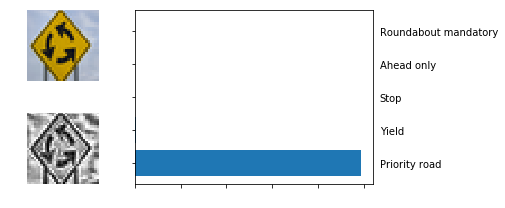

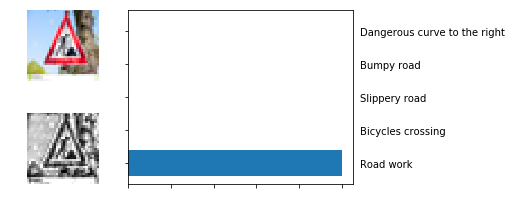

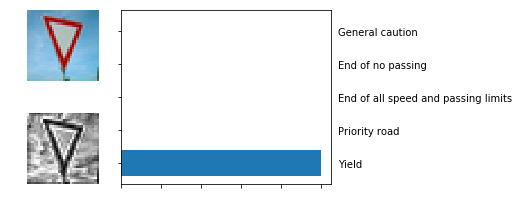

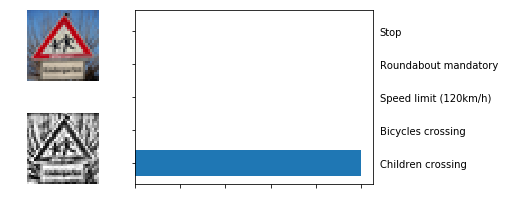

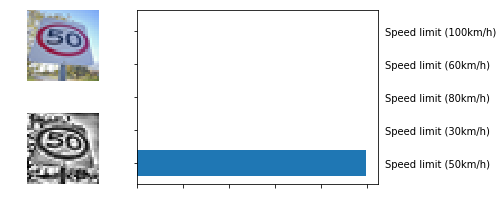

In [213]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
#print (top_k_predictions[0])
filenames = ['RoundaboutMandatory', 'RoadWork', 'Yield', 'ChildrenCrossing', 'SpeedLimit50', 'Stop']
for i in range(0, 5):
    plot_image_statistics(top_k_predictions, filenames, new_images_, X_new, i)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

In [218]:
for idx in range(0, 6):
    print (filenames[idx])
    for k in range(0, 5):
        print(signnames[top_k_predictions[1][idx][k]] + ": " + str(top_k_predictions[0][idx][k]))

RoundaboutMandatory
Priority road: 0.989575088024
Yield: 0.00529247801751
Stop: 0.00103384349495
Ahead only: 0.00102106039412
Roundabout mandatory: 0.000658783596009
RoadWork
Road work: 1.0
Bicycles crossing: 2.66110934964e-14
Slippery road: 6.43749910353e-16
Bumpy road: 5.41721721362e-16
Dangerous curve to the right: 2.68919394991e-17
Yield
Yield: 1.0
Priority road: 3.73760499957e-19
End of all speed and passing limits: 1.00851527998e-24
End of no passing: 9.3484531167e-29
General caution: 9.06802387418e-29
ChildrenCrossing
Children crossing: 1.0
Bicycles crossing: 1.64836304328e-11
Speed limit (120km/h): 1.59387172243e-14
Roundabout mandatory: 8.3265854403e-15
Stop: 1.98137692912e-15
SpeedLimit50
Speed limit (50km/h): 0.999192535877
Speed limit (30km/h): 0.000553100195248
Speed limit (80km/h): 0.00023143949511
Speed limit (60km/h): 2.27998207265e-05
Speed limit (100km/h): 4.26735091708e-08
Stop
Stop: 1.0
Keep left: 2.70686010118e-21
Priority road: 3.03382878477e-22
End of speed limit

/home/wengyao04/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  after removing the cwd from sys.path.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from /home/wengyao04/machine_learning/udacity_selfdrivingcar_nanodegree/CarND-Traffic-Sign-Classifier-Project/model
(1, 32, 32, 1)


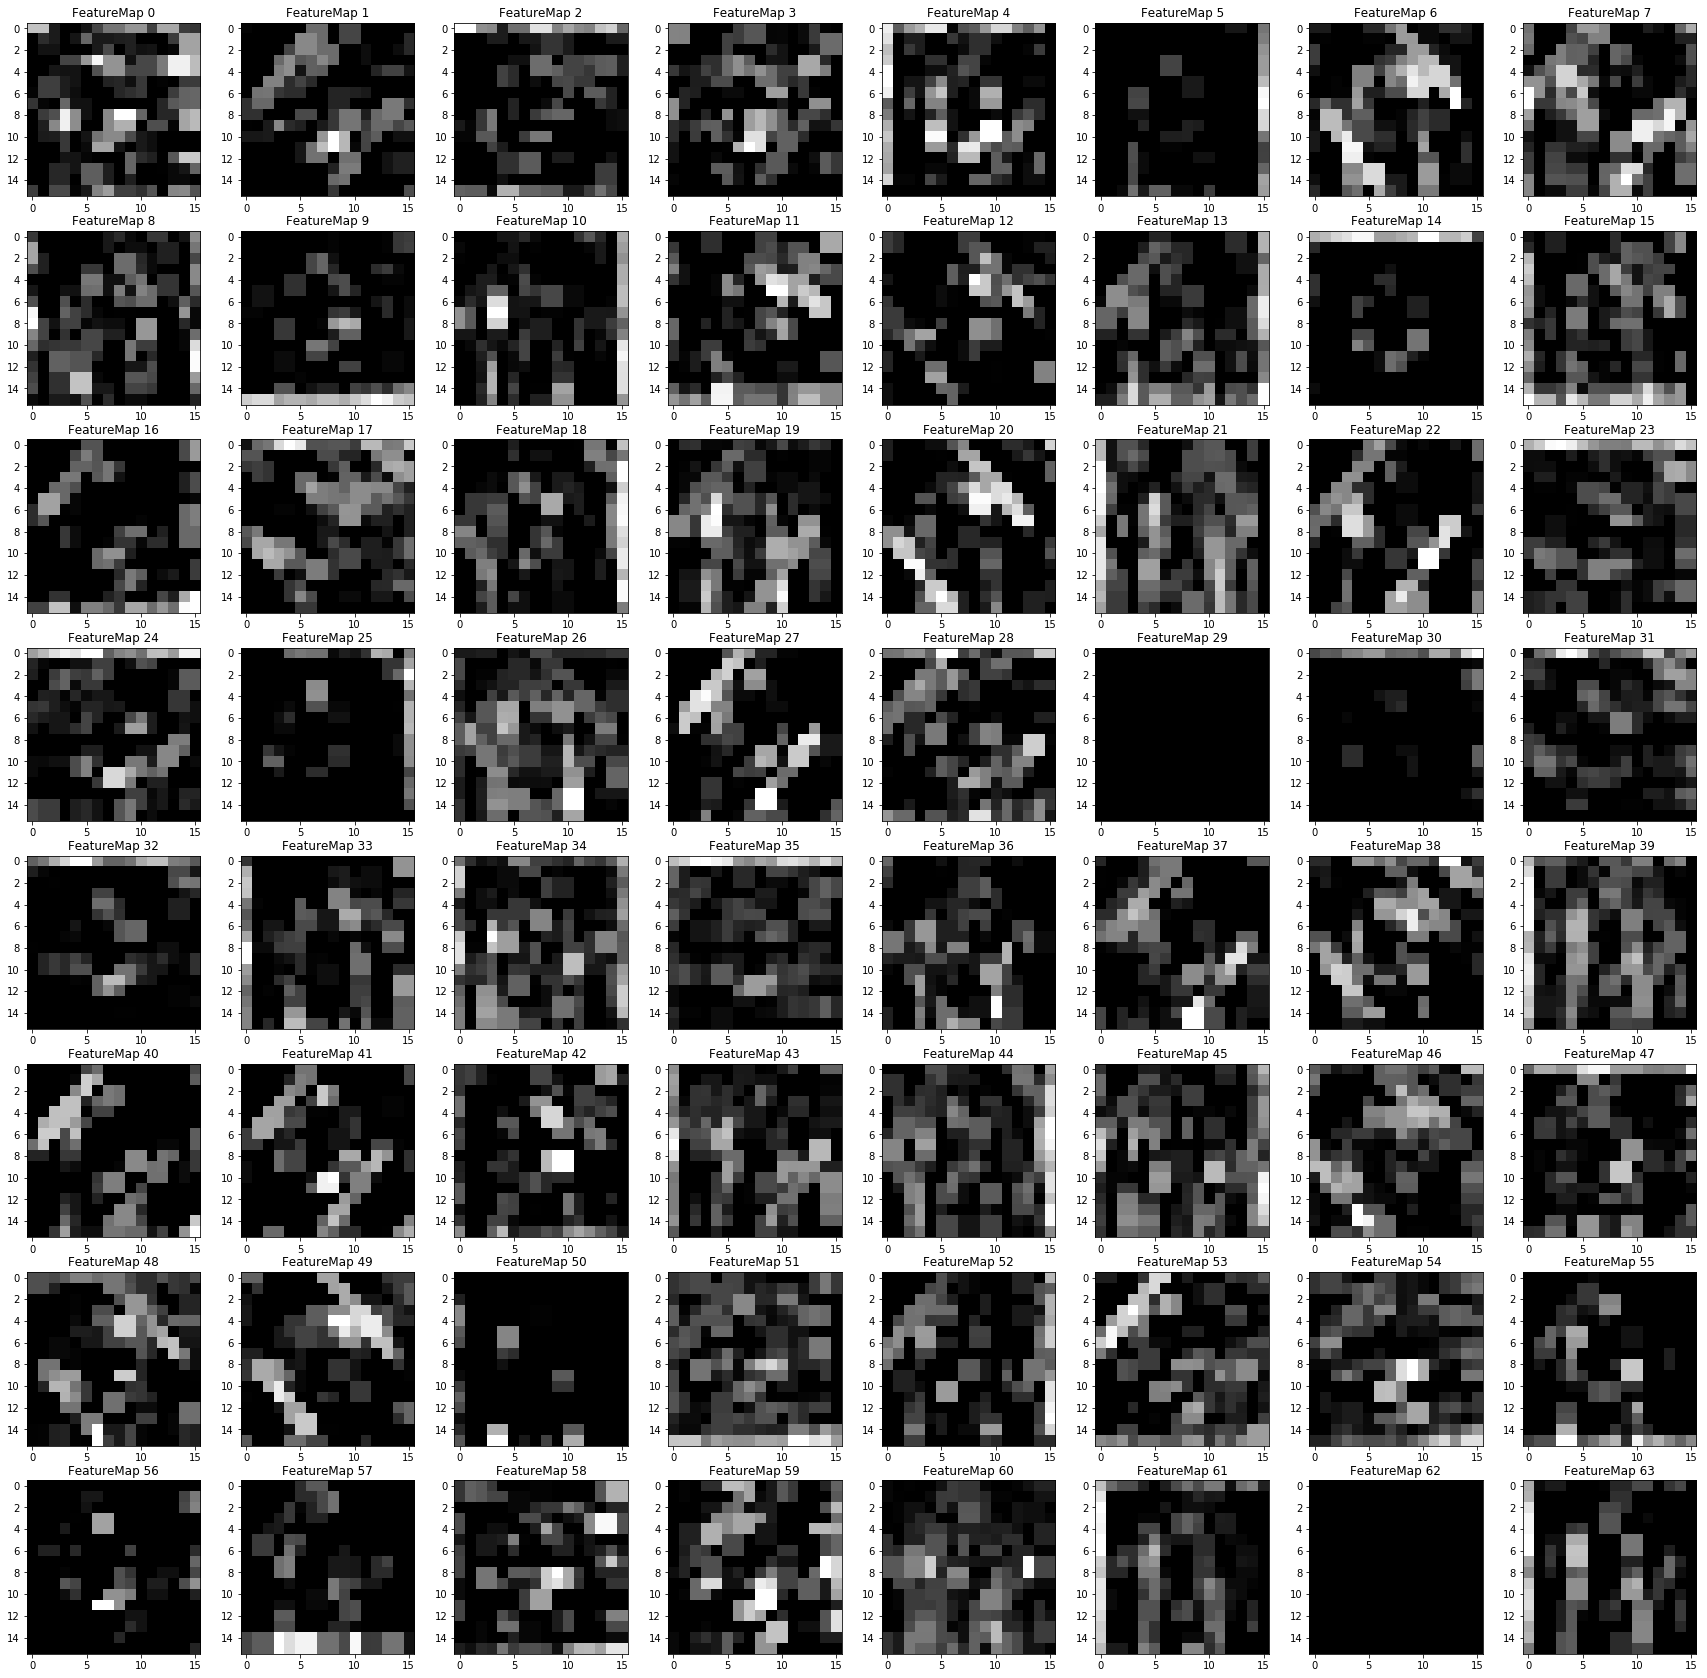

In [228]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(X):
    with tf.variable_scope("model_variable", reuse=True):
        image = tf.placeholder(tf.float32, shape = (None, 32, 32, 1))
        is_training = tf.placeholder(tf.bool)
        train_op = inference(image, is_training)
        conv1 = train_op['pooling1']
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    tf.train.Saver().restore(sess, tf.train.latest_checkpoint('.'))
    #conv1_layer = tf.get_default_graph().get_tensor_by_name('model_variable/conv1/model_variable/conv1:0')
    #outputFeatureMap(X_new, conv1_layer)
    #print (tf.get_default_graph())
    for offset in range(0, 1):
        x_batch = X_new[offset:offset+1]
        print (x_batch.shape)
        activation = sess.run(conv1, feed_dict = {image : x_batch, is_training: False})
        #print (conv1_)
        #print (conv1)
        featuremaps = activation.shape[3]
        fig = plt.figure(1, figsize=(30,30))
        for featuremap in range(featuremaps):
            plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        plt.savefig('roundabout_conv1.png')
    #for x_batch in batch_iterator(X):
        #tf.train.Saver().restore(sess, tf.train.latest_checkpoint('.'))
        #print (conv1)
    #    activation = sess.run([conv1], feed_dict = {image : X, is_training: False})
        #print (activation[0].shape)
        #featuremaps = activation.shape[3]
outputFeatureMap(X_new)

In [33]:
#[op.name for op in tf.get_default_graph().get_operations()]
#test(X_new)